In [1]:
import os
import ast
import shutil as sh
from pathlib import Path
import random

import numpy as np
import pandas as pd

import PIL

import torch

from tqdm.auto import tqdm

from IPython.display import Image, clear_output

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pwd

/content


In [ ]:
!ls

sample_data


In [2]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists
 10687bb0-15e8-4379-a450-79b0973dfee6_Original.jpg
'2016 Aug.pdf'
'2016 Oct.pdf'
'2016 Sep.pdf'
'2017 Mar.jpg'
'2017 Mar.pdf'
 26_Original.jpg
 53D1321C-B610-4D5A-A439-A95CB9E1807A.JPEG
 561
 88f88ddf-a0eb-415a-891b-2f54d8613ff9_Original.jpg
 91190_Original.jpg
 9C4206CD-42B8-4A0B-8FC5-59D9B905C450.JPEG
 Aadharcard.pdf
'All Photos.zip'
 Anisha_Passport_VISA.pdf
'Ani-sign 001.jpg'
 Assignment3-Part2.ipynb
'ASSIGNMENT_Anisha Vijayan_Belgium.pdf'
'Assignment Letter.pdf'
 Assignment.zip
 b184afe0-aefb-49d5-8e44-5e5a2f23f459_Original.jpg
 BEmarksheets.pdf
'Business Data Visualization.zip'
 CO3A0303.jpg
 COC_FINAL.pdf
'Colab Notebooks'
'Copy of IMG_20181209_152305.jpg'
'Copy of VID20220604181348.mp4'
'CTC Sheet.docx'
 d1fd6b66-952a-4c75-8206-9cf2f251dcbe_Original.jpg
 d44c01e0-da19-47cc-a2b0-1d80887b7a4e_Original.jpg
 Data
 DE05641E-4BE8-4BEA-87D1-2CB93CDC3084.JPG
'Deloitte Offer - signed.pdf'
 DL
 DOTA_devkit
 DSC_0178.jpg


In [4]:
%cd /mydrive/DL

/content/gdrive/My Drive/DL


In [ ]:
!ls 

DOTA_devkit   testsplit_10	  trainsplit.json   valsplit_50.json
model_10.pth  train_10		  val		    valsplit.json
model_1.pth   trainsplit_10	  valsplit	    yolo
model.pth     trainsplit_10.json  valsplit_10
test	      trainsplit_50.json  valsplit_10.json


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo

Cloning into 'yolov5'...
remote: Enumerating objects: 15365, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 15365 (delta 1), reused 7 (delta 1), pack-reused 15355
Receiving objects: 100% (15365/15365), 14.36 MiB | 12.48 MiB/s, done.
Resolving deltas: 100% (10501/10501), done.


In [5]:
!pip install -qr yolov5/requirements.txt  # install dependencies

In [6]:
%cd /mydrive/DL

/content/gdrive/My Drive/DL


In [7]:
!sudo apt-get install swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (4.0.1-5build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [8]:
%cd ..
%cd /mydrive/DL/DOTA_devkit

/content/gdrive/MyDrive
/content/gdrive/My Drive/DL/DOTA_devkit


In [9]:
!swig -c++ -python polyiou.i
!python setup.py build_ext --inplace

running build_ext
building '_polyiou' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.9 -c polyiou.cpp -o build/temp.linux-x86_64-3.9/polyiou.o
polyiou.cpp: In function ‘double intersectArea(Point, Point, Point, Point)’:
polyiou.cpp:88:5: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
   88 |     if(s1*s2==-1) res=-res;return res;
      |     ^~
polyiou.cpp:88:28: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘if’
   88 |     if(s1*s2==-1) res=-res;return res;
      |                            ^~~~~~
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -

In [10]:
!pip install -v -e .

Using pip 22.0.4 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/gdrive/MyDrive/DL/DOTA_devkit
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-hh6nu31c/polyiou.egg-info
  writing /tmp/pip-pip-egg-info-hh6nu31c/polyiou.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-hh6nu31c/polyiou.egg-info/dependency_links.txt
  writing top-level names to /tmp/pip-pip-egg-info-hh6nu31c/polyiou.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-hh6nu31c/polyiou.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-hh6nu31c/polyiou.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-hh6nu31c/polyiou.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Attempting uninstall: polyiou
    Found existing installation: polyiou 0.1
    Can't uni

In [ ]:
#!python dota2yolov5.py  #RUN ONLY ONCE

Start to conver DOTA's labelTxt-v1.5 dataset for qqwweee/keras-yolo3


In [ ]:
!pwd

/content/gdrive/MyDrive/DL/DOTA_devkit


In [11]:
%cd ..
%cd /content/gdrive/MyDrive/DL/yolov5

/content/gdrive/MyDrive/DL
/content/gdrive/MyDrive/DL/yolov5


In [27]:
import os
FOLDER_PATH = 'images'
ROOT_PATH = '/content/gdrive/MyDrive/DL/val'
print(len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))

458


In [28]:
import os
FOLDER_PATH = 'images'
ROOT_PATH = '/content/gdrive/MyDrive/DL/yolo/data/val'
print(len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))

458


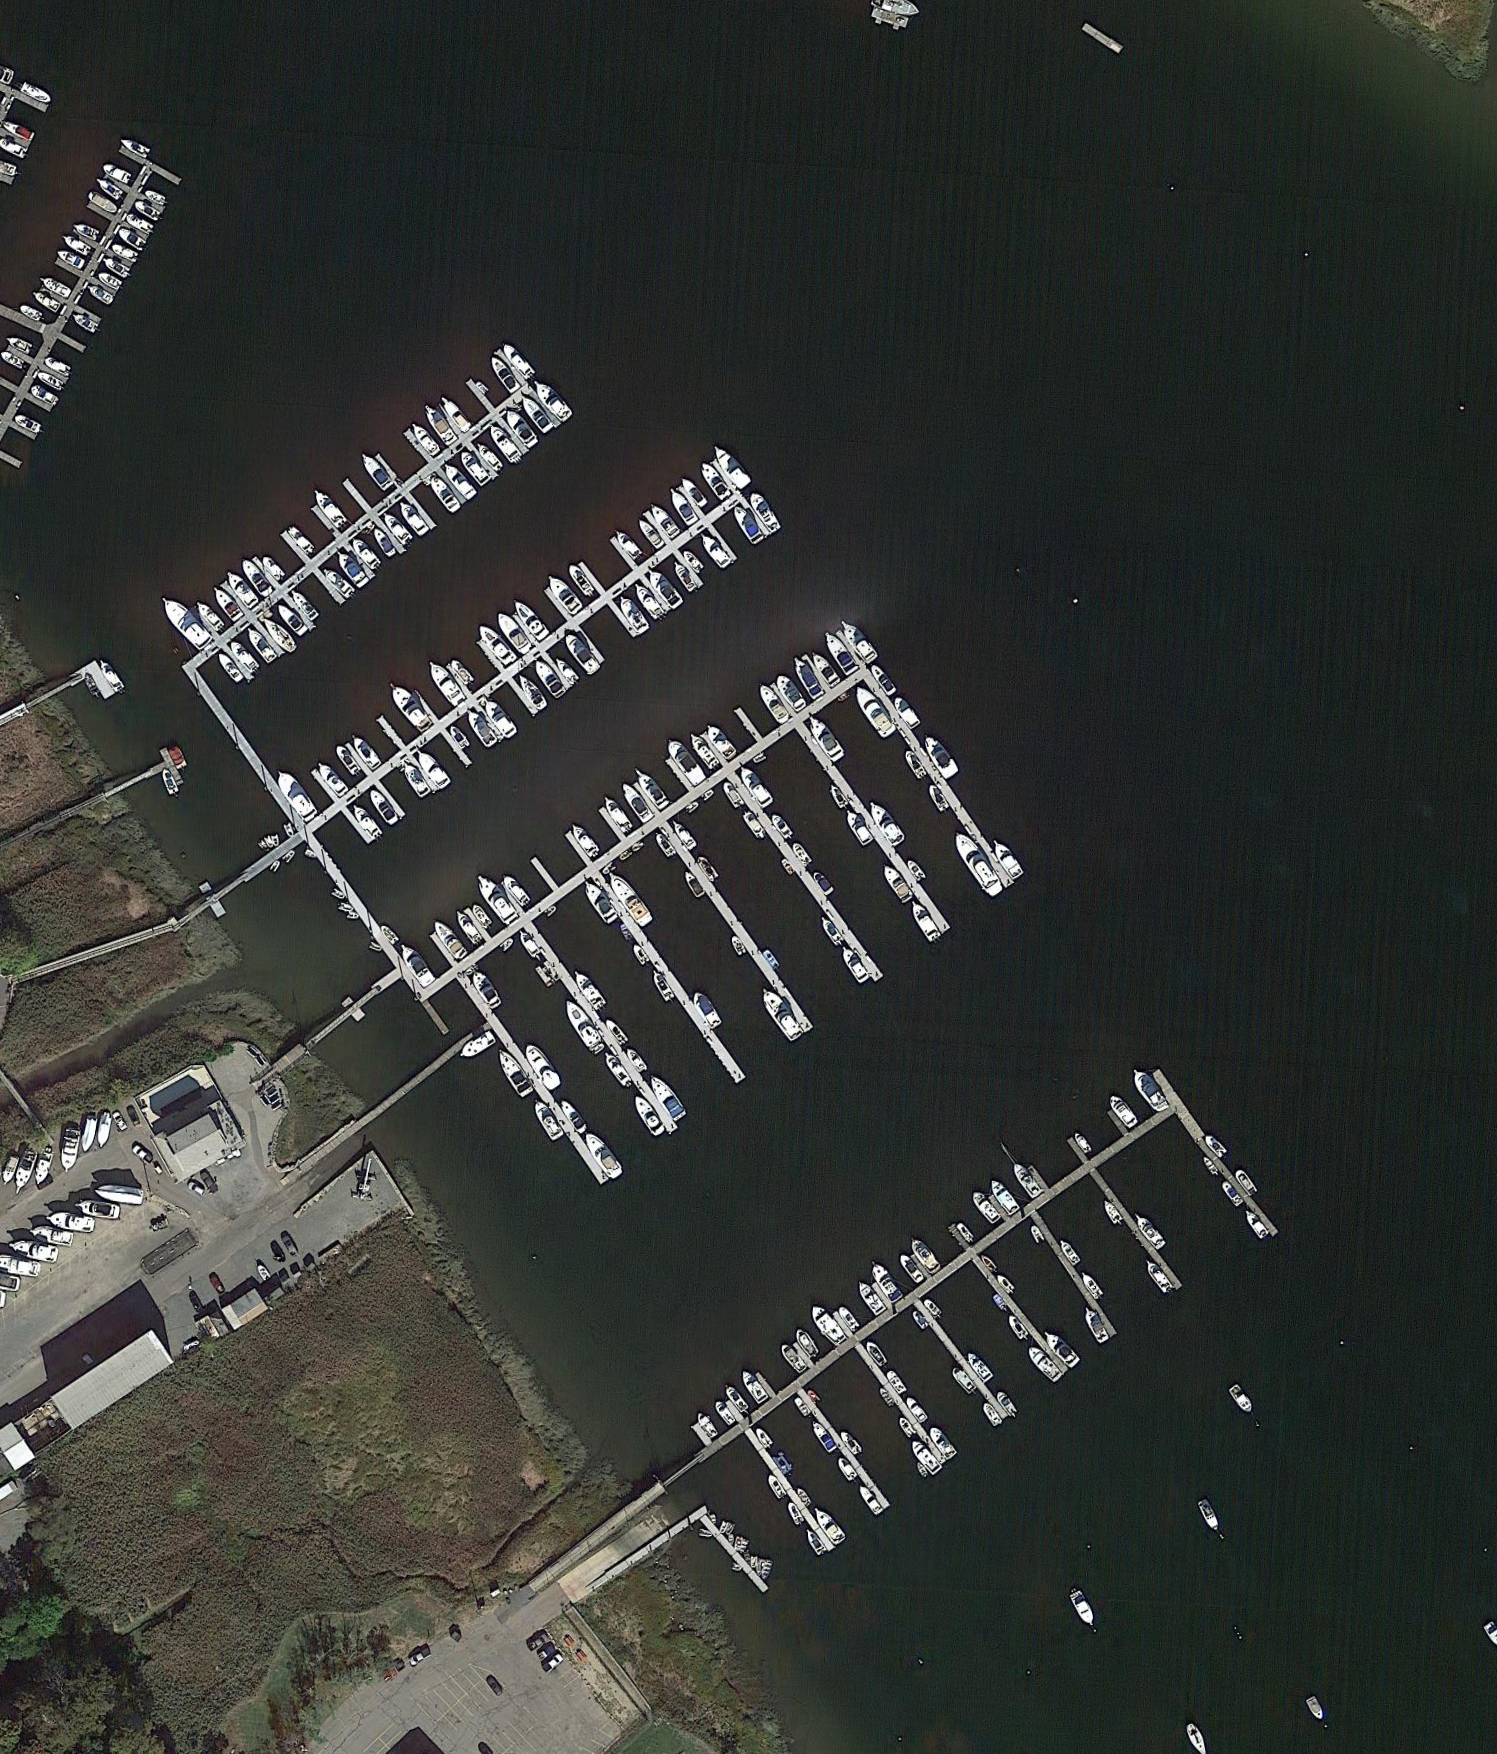

In [12]:
DATA_DIR = Path('/content/gdrive/MyDrive/DL/yolo/data/train')
img_list = list(DATA_DIR.glob('images/*.png'))
pickone = random.choice(img_list)
img = PIL.Image.open(pickone)
display(img)

In [13]:
img_list

[PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P0126.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P1191.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P1105.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P1054.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P1118.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P0918.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P0980.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P0023.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P0810.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P0779.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P0691.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P0714.png'),
 PosixPath('/content/gdrive/MyDrive/DL/yolo/data/train/images/P0676.png'),
 PosixPath('/content/gdri

In [14]:
only_files = [DATA_DIR / f.name for f in img_list if os.path.isfile(f) and f.name[-4:] == ".png"]
print("Found {} images files in {}".format(len(only_files), DATA_DIR))

IMAGE_HEIGHT, IMAGE_WIDTH = img.size
num_channels = len(img.mode)
print("Image size: {}".format((IMAGE_HEIGHT, IMAGE_WIDTH)))
print("Num channels: {}".format(num_channels))

Found 1411 images files in /content/gdrive/MyDrive/DL/yolo/data/train
Image size: (1497, 1754)
Num channels: 3


In [ ]:
import os 
import tqdm.notebook

# Create 512x512 tiles with 64 pix overlap in /kaggle/working
TILE_WIDTH = 512
TILE_HEIGHT = 512
TILE_OVERLAP = 64
TRUNCATED_PERCENT = 0.3
_overwriteFiles = True

TILES_DIR = {'train': Path('/content/gdrive/MyDrive/DL/yolov5/train/images/'),
             'val': Path('/content/gdrive/MyDrive/DL/yolov5/val/images/')}
for _, folder in TILES_DIR.items():
    if not os.path.isdir(folder):
        os.makedirs(folder)

LABELS_DIR = {'train': Path('/content/gdrive/MyDrive/DL/yolov5/train/labels/'),
              'val': Path('/content/gdrive/MyDrive/DL/yolov5/val/labels/')}
for _, folder in LABELS_DIR.items():
    if not os.path.isdir(folder):
        os.makedirs(folder)

# Save one line in .txt file for each tag found inside the tile
def tag_is_inside_tile(bounds, x_start, y_start, width, height, truncated_percent):
    x_min, y_min, x_max, y_max = bounds
    x_min, y_min, x_max, y_max = x_min - x_start, y_min - y_start, x_max - x_start, y_max - y_start

    if (x_min > width) or (x_max < 0.0) or (y_min > height) or (y_max < 0.0):
        return None
    
    x_max_trunc = min(x_max, width) 
    x_min_trunc = max(x_min, 0) 
    if (x_max_trunc - x_min_trunc) / (x_max - x_min) < truncated_percent:
        return None

    y_max_trunc = min(y_max, width) 
    y_min_trunc = max(y_min, 0) 
    if (y_max_trunc - y_min_trunc) / (y_max - y_min) < truncated_percent:
        return None
        
    x_center = (x_min_trunc + x_max_trunc) / 2.0 / width
    y_center = (y_min_trunc + y_max_trunc) / 2.0 / height
    x_extend = (x_max_trunc - x_min_trunc) / width
    y_extend = (y_max_trunc - y_min_trunc) / height
    
    return (0, x_center, y_center, x_extend, y_extend)
            
for img_path in tqdm.notebook.tqdm(img_list):
    # Open image and related data
    pil_img = PIL.Image.open(img_path, mode='r')
    np_img = np.array(pil_img, dtype=np.uint8)

    # Get annotations for image
    img_labels = df[df["image_id"] == img_path.name]
    #print(img_labels)

    # Count number of sections to make
    X_TILES = (IMAGE_WIDTH + TILE_WIDTH - TILE_OVERLAP - 1) // (TILE_WIDTH - TILE_OVERLAP)
    Y_TILES = (IMAGE_HEIGHT + TILE_HEIGHT - TILE_OVERLAP - 1) // (TILE_HEIGHT - TILE_OVERLAP)
    
    # Cut each tile
    for x in range(X_TILES):
        for y in range(Y_TILES):

            x_end = min((x + 1) * TILE_WIDTH - TILE_OVERLAP * (x != 0), IMAGE_WIDTH)
            x_start = x_end - TILE_WIDTH
            y_end = min((y + 1) * TILE_HEIGHT - TILE_OVERLAP * (y != 0), IMAGE_HEIGHT)
            y_start = y_end - TILE_HEIGHT
            #print(x_start, y_start)

            folder = 'val' if img_path.name in val_indexes else 'train'
            save_tile_path = TILES_DIR[folder].joinpath(img_path.stem + "_" + str(x_start) + "_" + str(y_start) + ".jpg")
            save_label_path = LABELS_DIR[folder].joinpath(img_path.stem + "_" + str(x_start) + "_" + str(y_start) + ".txt")
                
            # Save if file doesn't exit
            if _overwriteFiles or not os.path.isfile(save_tile_path):
                cut_tile = np.zeros(shape=(TILE_WIDTH, TILE_HEIGHT, 3), dtype=np.uint8)
                cut_tile[0:TILE_HEIGHT, 0:TILE_WIDTH, :] = np_img[y_start:y_end, x_start:x_end, :]
                cut_tile_img = PIL.Image.fromarray(cut_tile)
                cut_tile_img.save(save_tile_path)

            found_tags = [
                tag_is_inside_tile(bounds, x_start, y_start, TILE_WIDTH, TILE_HEIGHT, TRUNCATED_PERCENT)
                for i, bounds in enumerate(img_labels['bounds'])]
            found_tags = [el for el in found_tags if el is not None]

            # save labels
            with open(save_label_path, 'w+') as f:
                for tags in found_tags:
                    f.write(' '.join(str(x) for x in tags) + '\n')

In [15]:
%cd /content/gdrive/MyDrive/DL/yolov5

/content/gdrive/MyDrive/DL/yolov5


In [16]:
CONFIG = """
# train and val datasets (image directory or *.txt file with image paths)
train: /content/gdrive/MyDrive/DL/yolo/data/train/images
val: /content/gdrive/MyDrive/DL/yolo/data/val/images

# number of classes
nc: 15

# class names
names: ['plane', 'baseball-diamond', 'bridge', 'ground-track-field', 'small-vehicle', 'large-vehicle', 'ship', 'tennis-court','basketball-court'
, 'storage-tank',  'soccer-ball-field', 'roundabout', 'harbor', 'swimming-pool', 'helicopeter']
"""

with open("dataset.yaml", "w") as f:
    f.write(CONFIG)

In [17]:
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.0+cu118 CPU


In [18]:
!pip uninstall -y wandb

In [19]:
# remove previous runs so that following cells works with 'exp' folder
!rm -rf /content/gdrive/MyDrive/DL/yolov5/runs

In [ ]:
!python /content/gdrive/MyDrive/DL/yolov5/train.py --cfg models/yolov5s.yaml --img 640 --batch-size 4 --epochs 10 --data /content/gdrive/MyDrive/DL/yolov5/dataset.yaml --weights yolov5s.pt

2023-04-04 20:18:06.410817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 20:18:09.279556: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/gdrive/MyDrive/DL/yolov5/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1,